# Multiple Linear Regression 多元线性回归

在本课程中，您将扩展您对简单线性回归的了解，您可以使用定量解释变量预测定量响应变量。也就是说，您使用的方程式如下：

$\hat{y} = b_0 + b_1x_1$

在本课程中，您将学习多元线性回归。在这些情况下，您将使用定量和分类x变量来预测定量响应。也就是说，您将创建这样的方程式来预测您的响应：

$\hat{y} = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_4x_4$

此外，您将学习如何评估多元线性回归中可能发生的问题，如何解决这些问题，以及如何评估模型的执行情况。事实证明，**Rsquared**可以使用，但可能会产生误导。而且，遗憾的是，相关系数只是**两个定量**变量之间线性关系的度量，因此在多元线性回归的情况下它不会非常有用。

这里有一个很好的额外资源：[统计学习简介](http://faculty.marshall.usc.edu/gareth-james/)全文。这是一本绝对引人入胜的机器学习入门书。

具体来说，第3章讨论了本课程中的许多想法。文本中执行的编程在R中，但我们将继续在本课程中使用Python。

如果你想完全掌握我们将在Python中使用的函数**如何**适应多个线性回归模型，那么绝对有必要牢牢掌握线性代数。虽然你可以在不知道线性代数的情况下完成这个类（并且在python中拟合多个线性回归模型），但是线性代数对于理解你为什么要从Python获得某些结果有用，以及如果出现问题需要进行故障排除。模型。

当您完成本课程时，您将看到一些奇怪输出的实例，您可以从多个线性回归输出中获得这些实例。如果您在继续之前需要线性代数复习，下面列出了两个额外的资源！

- [可汗学院的线性代数免费课程，以便](https://www.khanacademy.org/math/linear-algebra)您需要复习。

- 本课程中课外教材中的线性代数和NumPy进修课程。

# 多元线性回归简介
Multiple_Linear_Regression_Introduction.ipynb

在 notebook 以及下面的测试题目中，你将创建几个简单的线性回归模型以及多元线性回归模型来预测房屋价值。

首先，让我们导入必要的库并读取你将使用的数据，然后开始你的任务吧。

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sms

df = pd.read_csv('datasets/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` 使用 statsmodels，拟合三个单独的简单线性回归模型来预测价格。 在这三个模型中，应有一个使用 **area** ，一个使用 **bedrooms** ，另一个使用 **bathrooms** 。另外，每个模型中都要使用一个截距。 

使用每个模型的结果来回答下面的前两个测试题目。

`2.` 你已经看到了简单线性回归模型的结果，接下来，让我们同时使用这三个变量尝试一个多元线性回归模型。在这个模型中，做一个截距。

`3.` 除了使用 **area** 、 **bedrooms** 与 **bathrooms** ，你可能还想使用 **style** 来预测房屋价格。尝试把它添加到你的多元线性回归模型中吧。你得到了什么结果？通过下面的最后一道测试题目给出你的答案吧。

In [2]:
df['intercept'] = 1
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1
3,3525,A,1940,4,2,ranch,493675,1
4,5108,B,2208,6,4,victorian,1101539,1


In [3]:
def line_reg(*pat):
    pat_list = [*pat]
    pat_list.append('intercept')
    lr_model = sms.OLS(df['price'], df[pat_list])
    res = lr_model.fit()
    print(res.summary())
    if len(pat_list) < 3:
        df[[*pat, 'price']].plot.scatter(*pat, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:58:28   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         348.4664      3.093    112.662      0.0

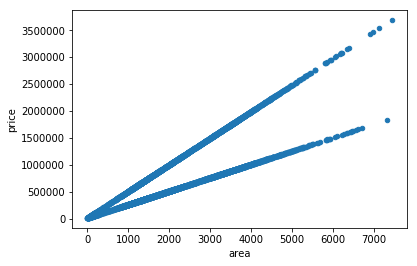

In [4]:
line_reg('area')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7446.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:58:29   Log-Likelihood:                -85509.
No. Observations:                6028   AIC:                         1.710e+05
Df Residuals:                    6026   BIC:                         1.710e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    2.284e+05   2646.744     86.289      0.0

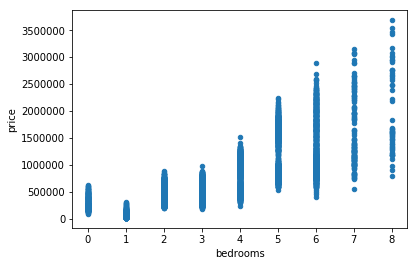

In [5]:
line_reg('bedrooms')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     7116.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:58:31   Log-Likelihood:                -85583.
No. Observations:                6028   AIC:                         1.712e+05
Df Residuals:                    6026   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   3.295e+05   3905.540     84.358      0.0

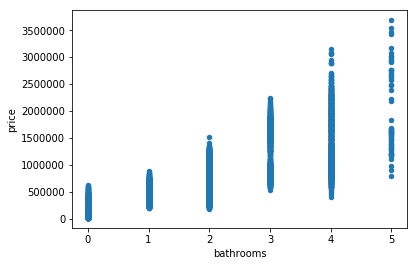

In [6]:
line_reg('bathrooms')

In [7]:
line_reg('area', 'bedrooms', 'bathrooms')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:58:33   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         345.9110      7.227     47.863      0.0

In [74]:
mlr2 = sms.OLS(df['price'],
               df[['intercept', 'area', 'bedrooms', 'bathrooms', 'style']])
results_mlr2 = mlr2.fit()
results_mlr2.summary()

KeyError: "['intercept'] not in index"

`Error:ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).`

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.00d20kgqioq3.png)

# 在多元线性回归里，我们要如何找到 “正确” 的系数 

在简单线性回归那一节中，你知道了我们为什么要最小化每个实际数据点与模型预测值之间的平方距离。 

但在多元线性回归中，我们要找的数据点所处的空间实际上不仅仅是二维的。 

总而言之，重点在于我们可以计算 $(X'X)^-X'y$ ，从而找出最优 $\beta$ 预测值。 

在接下来的视频中，你将使用 statsmodel 来求得系数，这些系数会与上一概念涉及的系数相似，但你还要用上述等式来解出该系数，证明所得系数不是凭空捏造出来的。

```
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
==============================================================================
```

使用这上面矩阵中的数据得到这四个值

In [8]:
# 首先创建X矩阵
X = df[['intercept', 'bathrooms', 'bedrooms', 'area']]
y = df['price']

In [9]:
np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)

array([10072.10704671,  7345.3917137 , -2925.80632467,   345.91101884])

 $\hat{\beta} = (X'X)^-X'y$
 
通过得到X估算系数，这称为转置矩阵然后乘以X，通过求逆运算我们再乘以X转置矩阵然后乘以反应矢量Y.

# 多元线性回归的模型结果
在本视频中，所有系数都为正值，因此我们可以将各系数解释为： **在模型其它变量不变的情况下，解释变量每增加一个单位，反应变量会随之增加的预测幅度。** 

不过，一般来说，系数可能是正值，也可能是负值，因此，每个系数都是 “在模型其它变量不变的情况下，解释变量每增加一个单位，反应变量会随之发生的预测 **变化**”。 

这个解释和你在上一节课看到的十分相似，只是多了很简单的一句：**“在其它变量不变的情况下”**，也就是说，只有当与系数有关的变量增加 1，反应变量才会变化，但其它变量都不会变化。 

## 解释多元线性回归的系数 

解释与定量变量有关的系数 

接下来我们要开始接触同时涉及数学、代码和现实三者的材料了。在探讨代码问题之前，我们得先解决所有基本问题，这一点很重要。
![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.ni0iew6qk8.png)

# 虚拟变量的数学原理 

在上个视频中，你知道了要往线性模型里添加分类变量，就需要把分类变量转变为 **虚拟变量**。 

转化后，你需要舍弃一个 **虚拟列**，才能得到 [满秩](https://www.cds.caltech.edu/~murray/amwiki/index.php/FAQ:_What_does_it_mean_for_a_non-square_matrix_to_be_full_rank%3F) 矩阵。 

回想一下回归系数闭式解那节内容，我们得用 $(X'X)^-X'y$ 来预测 $\beta$ 值。 

为了逆转 $(X'X)$，矩阵 $X$ 一定要是满秩的，也就是说，所有 $X$ 的列都必须线性独立。 

创建虚拟变量时，如果你不舍弃掉一列，那你就得不到稳定解，从 python 里得到的结果也不会可靠到哪去。下个概念会有示例，你将从中了解不舍弃一个虚拟列的话，会有什么后果。 

本文重点在于 **如果你要用 0 、1 编码来创建虚拟变量，你就得舍弃一个虚拟列，确保所得矩阵是满秩的（这样你从 python 里得到的解才会是可靠的。）** 

之所以要这么做，原因就在于线性代数的本质，更具体地说，要逆转矩阵，你手里的矩阵必须是满秩的 （也就是所有列都得线性独立），因此，你得舍弃掉一个虚拟列，方能得到线性独立的各列 （和一个满秩矩阵）。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.5daj48nfu9c.png)

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.h18v2u3jcsh.png)

## 虚拟变量
DummyVariables.ipynb

你在前面的 notebook 中已经看到了，你无法直接将分类变量添加到多重线性回归模型中。在这个 notebook 中，你会进行一些练习，学习如何在模型中添加虚拟变量并解释输出。

首先，让我们导入必要的库和数据，然后开始你的任务吧。

In [67]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('datasets/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.` 使用 [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) 文档帮助你获取 **相邻** 列的虚拟变量。然后，使用 [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) 将虚拟变量添加在数据帧中，即 **df**，并将连接结果集存储在 **df_new** 中。

使用所有三个相邻邻域的线性模型来预测价格。使用 **所有三级** **相邻** 邻域拟合一个线性模型来来预测价格。不要忘记添加一个截距。

使用你的结果来回答下面的测试1中的问题。

In [68]:
neighborhood_dummies = pd.get_dummies(df['neighborhood'])
df_new = df.join(neighborhood_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C
0,1112,B,1188,3,2,ranch,598291,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0
2,5952,B,1134,3,2,ranch,571669,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0


In [69]:
df_new['intercept'] = 1
lm = sm.OLS(df_new['price'], df_new[['intercept', 'A', 'B', 'C']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:02:07   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.381e+05   4439.653    121.210      0.000    5.29e+05    5.47e+05
A           3001.8311   8650.726      0.347      0.729    -1.4e+04       2e+04
B           5.325e+05   7894.313     67.448      0.000    5.17e+05    5.48e+05
C           2669.4717   8925.271      0.299      0.765   -1.48e+04    2.02e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                     1.32e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`2.`  现在，使用 **邻域** 拟合一个合适的线性模型来预测一个房屋的价格。用 **邻域 A** 当做你的基线。使用你的结果模型来回答下面的测试2与测试3中的问题。

In [70]:
lm2 = sm.OLS(df_new['price'], df_new[['intercept', 'B', 'C']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:02:23   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`3.` 3.运行下面的两个单元格来查看邻域 **A** 与 **C** 的房价。添加一个邻域 **B**。 这样，你可以大致了解在以前的线性模型中发现的差异。

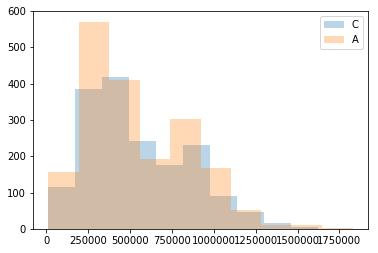

In [71]:
plt.hist(df_new.query("C == 1")['price'], alpha=0.3, label='C')
plt.hist(df_new.query("A == 1")['price'], alpha=0.3, label='A')

plt.legend()

`4.` 现在，添加虚拟变量的房屋 **style** 以及 **邻域**。  使用 **ranch** 作为 **style** 的基线。另外，为你的线性模型添加 **bathrooms** 与 **bedrooms** 。 不要忘记添加一个截距。使用线性模型的结果来回答下面的最后两个问题。 **房价是用美元衡量的，而且这个数据集不是真实的。**


In [72]:
type_dummies = pd.get_dummies(df['style'])
df_new = df_new.join(type_dummies)
df_new.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,A,B,C,intercept,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0,1,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,1,0,1,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0,1,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,0,0,1,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1,0,1,0,0,1


In [73]:
lm3 = sm.OLS(
    df_new['price'], df_new[[
        'intercept', 'B', 'C', 'lodge', 'victorian', 'bedrooms', 'bathrooms'
    ]])
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:03:26   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.6s3zsh9w59.png)

# 其它编码

One_Zero_Negative_One Coding.ipynb

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('datasets/house_prices.csv')
df2 = df.copy()
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [15]:
## The below function creates 1, 0, -1 coded dummy variables.


def dummy_cat(df, col):
    '''
    INPUT:
    df - the dataframe where col is stored
    col - the categorical column you want to dummy (as a string)
    OUTPUT:
    df - the dataframe with the added columns
         for dummy variables using 1, 0, -1 coding
    '''
    for idx, val_0 in enumerate(df[col].unique()):
        if idx + 1 < df[col].nunique():
            df[val_0] = df[col].apply(lambda x: 1 if x == val_0 else 0)
        else:
            df[val_0] = df[col].apply(lambda x: -1 if x == val_0 else 0)
            for idx, val_1 in enumerate(df[col].unique()):
                if idx + 1 < df[col].nunique():
                    df[val_1] = df[val_0] + df[val_1]
                else:
                    del df[val_1]
    return df

In [16]:
new_df = dummy_cat(df, 'style')  # Use on style
new_df.head(10)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0
1,491,B,3512,5,3,victorian,1744259,0,1
2,5952,B,1134,3,2,ranch,571669,1,0
3,3525,A,1940,4,2,ranch,493675,1,0
4,5108,B,2208,6,4,victorian,1101539,0,1
5,7507,C,1785,4,2,lodge,455235,-1,-1
6,4964,B,2996,5,3,victorian,1489871,0,1
7,7627,C,3263,5,3,victorian,821931,0,1
8,6571,A,1159,3,2,ranch,299903,1,0
9,5220,A,1248,3,2,victorian,321975,0,1


In [17]:
new_df['intercept'] = 1

lm = sm.OLS(new_df['price'], new_df[['intercept', 'ranch', 'victorian']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:58:36   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.421e+05   5854.251    109.677      0.000    6.31e+05    6.54e+05
ranch      -6.695e+04   8233.489     -8.131      0.000   -8.31e+04   -5.08e+04
victorian    4.04e+05   7377.372     54.763      0.000     3.9e+05    4.18e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         1.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
style_dummies = pd.get_dummies(df['style'])
new_df2 = df2.join(style_dummies)
new_df2.head(10)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,0,1,0
1,491,B,3512,5,3,victorian,1744259,0,0,1
2,5952,B,1134,3,2,ranch,571669,0,1,0
3,3525,A,1940,4,2,ranch,493675,0,1,0
4,5108,B,2208,6,4,victorian,1101539,0,0,1
5,7507,C,1785,4,2,lodge,455235,1,0,0
6,4964,B,2996,5,3,victorian,1489871,0,0,1
7,7627,C,3263,5,3,victorian,821931,0,0,1
8,6571,A,1159,3,2,ranch,299903,0,1,0
9,5220,A,1248,3,2,victorian,321975,0,0,1


In [19]:
new_df2['intercept'] = 1

lm2 = sm.OLS(new_df2['price'], new_df2[[
    'intercept',
    'ranch',
    'victorian',
]])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:58:37   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.05e+05   1.21e+04     25.120      0.000    2.81e+05    3.29e+05
ranch       2.701e+05   1.57e+04     17.153      0.000    2.39e+05    3.01e+05
victorian   7.411e+05   1.44e+04     51.396      0.000    7.13e+05    7.69e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
new_df2['intercept'] = 1

lm2 = sm.OLS(new_df2['price'], new_df2[['intercept']])
results2 = lm2.fit()
results2.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sun, 14 Jul 2019   Prob (F-statistic):                nan
Time:                        10:58:37   Log-Likelihood:                -87933.
No. Observations:                6028   AIC:                         1.759e+05
Df Residuals:                    6027   BIC:                         1.759e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.542e+05   6744.870    111.819      0.000    7.41e+05    7.67e+05
==============================================================================
Omnibus:                     1329.085   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2683.576
Skew:                           1.313   Prob(JB):                         0.00
Kurtosis:                       4.947   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

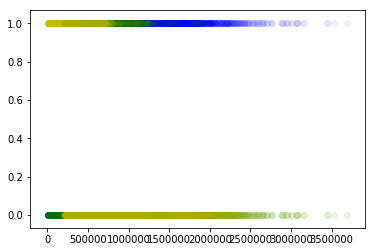

In [22]:
plt.scatter(new_df2['price'], new_df2['victorian'], alpha=0.05, color='b')
plt.scatter(new_df2['price'], new_df2['ranch'], alpha=0.05, color='g')
plt.scatter(new_df2['price'], new_df2['lodge'], alpha=0.05, color='y')

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.cbol6cw4uod.png)

# 线性模型假设 
 

## 模型假设及相应的解决方法 

之前的视频曾提到 [统计学习简介](http://faculty.marshall.usc.edu/gareth-james/) 一书，其中就提到了如下五个假设： 

1. 因变量-自变量关系的非线性 
2. 误差项的相关性 
3. 非恒定方差和正态分布误差 
4. 异常值/高杠杆点 
5. 共线性 

本文总结了判断上述问题是否存在的方法以及相应的解决办法。这是统计学家面试时经常提出的问题，但该问题是否有实际意义取决于你创建模型的目的。在接下来的概念中，我们会更仔细地研究某些相关知识点，因为我觉得我们需要额外注意那些，但下方为你列出了各知识点的详尽介绍，我们先来仔细看看下文涉及的每一项。 

## 线性 

线性是假设因变量和自变量之间真的存在可用线性模型解释的关系。如果线性假设不为真，那你的预测结果就不会很准确，此外，与系数有关的线性关系也就没什么用了。 

为了评估某段线性关系是否合理，一个很实用的方法是做预测值 ($\hat{y}$) 的残差 ($y - \hat{y}$) 图。如果图中出现多个曲线部分，那就意味着线性模型实际上可能并不拟合数据，自变量和因变量存在其它关系。创建非线性模型的办法有很多（甚至可以线性模型的形式来创建），其中几种办法会在本课后面的内容中提及。 

在本页底部的图片里，这些称为 **偏差** 模型。理想来说，我们想要的是像图片左上角残差图那样的随机散点图。 

## 相关误差 

如果我们是随时间变化来收集的数据（比如预测未来股价或利率），或数据与空间有关（如预测洪涝或干旱地区），那就很容易出现相关误差。通常，我们可以用过去数据点提供的信息（针对与时间有关的数据）或用相邻数据点提供的信息（针对与空间有关的数据）来提高预测结果。 

不考虑相关误差的主要问题在于：往往你会利用这一相关性，得到更好的未来事件预测数据或空间关联事件预测数据。 

要判断是否有相关误差，最常用的方法是观察收集数据的域。要是你不确定的话，你可以试试一个叫 [Durbin-Watson](https://en.wikipedia.org/wiki/Durbin–Watson_statistic) 的检验方法，人们常用该测试来评估误差相关性是否造成问题。还有 [ARIMA 或 ARMA](http://www.statsref.com/HTML/index.html?arima.html) 模型，人们常用这两个模型来利用误差相关性，以便做出更佳预测。 

## 非恒定方差和正态分布误差 

你预测的值不同，得到的预测值范围也不同，那就意味着方差不恒定。非恒定方差对预测好坏影响不大，但会导致置信区间和 p 值不准确，这种时候，在预测值接近实际值的那部分区域，系数的置信区间会太泛，而在预测值较远离实际值的区域则会太窄。 

通常来说，对数函数（或使用其它反应变量的变换方式）能够 “摆脱” 非恒定方差，而要选择合适的变换方式，我们一般会用 [Box-Cox](http://www.statisticshowto.com/box-cox-transformation/)。 

用预测值的残差图也可以评估非恒定方差。在本页底部的图片中，非恒定方差的标签为 **异方差**。理想来说，我们要的是一个有异方差残差的无偏模型（其异方差残差在一定数值范围内保持不变）。 

虽然本文并不探讨残差的正态性，如果你想创建可靠的置信区间，正态性回归假设就十分重要了，更多相关信息详见 [这里](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm)。 

## 异常值/杠杆点 

异常值和杠杆点是远离数据正常趋势的点。这些点会对你的解造成很大的影响，在现实中，这些点甚至可能是错误的。如果从不同来源收集数据，你就可能在记录或收集过程中造成某些数据值出错。 

异常值也可能是准确真实的数据点，而不一定是测量或数据输入错误。在这种情况下，'修复'就会变得更为主观。要如何处理这些异常值往往取决于你的分析目的。线性模型，特别是使用最小二乘法的线性模型，比较容易受到影响，也就是说，大异常值可能会大幅度地左右我们的结果。当然，异常值也有一些解决技巧，也就是我们常说的 **正则化**。本课不会谈及这些技巧，但在 [机器学习纳米学位免费课程](https://classroom.udacity.com/courses/ud120)中，我们对这些技巧做了粗略的介绍。 

而在宾夕法尼亚州立大学提供的完整回归课程里，就有特别长的篇幅在探讨杠杆点的问题，详见 [这里](https://onlinecourses.science.psu.edu/stat501/node/336)。 

## 共线性（多重共线性） 

如果我们的自变量彼此相关，就会出现多重共线性。多重共线性的一个主要问题在于：它会导致简单线性回归系数偏离我们想要的方向。 

要判断是否有多重共线性，最常见的办法是借助二变量图或 **方差膨胀因子 (variance inflation factors即 VIFs)**。下一概念我们就要更深入地探讨多重共线性，因而在此不做赘述。 

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.r8em74egmpd.png)

# 多重共线性与 VIF (variance inflation factors)方差膨胀因子

您在本视频中看到了识别多重共线性的两种不同方法：

- 我们可以看看每个解释变量与每个其他解释变量的相关性（用图或相关系数）。

- 我们可以查看每个变量的VIF，这个计算将在下一个视频中更详细地显示。
我们看到当x变量彼此相关时，我们可以在我们的多元线性回归模型中翻转关系，这与我们在查看双变量线性回归关系时所期望的一样。

[VIFs](https://etav.github.io/python/vif_factor_python.html) 相关网站以供参考。 

在本课程中，同学们只需要了解到多重共线性的原理，以及解决策略即可。其他内容可以作为选修内容。 

## 多重共线性 & VIF

Multicollinearity & VIFs.ipynb

在这里使用 notebook，回答有关多重共线性的测试题目。

让我们导入必要的库以及将要使用的数据，然后开始你的任务吧。

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('datasets/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`使用 [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) 通过运行下面的单元格来查看数据集中所有定量与解释变量的对应关系。你也可以尝试为 style 或 neighborhood 添加颜色 (**hue**) 。

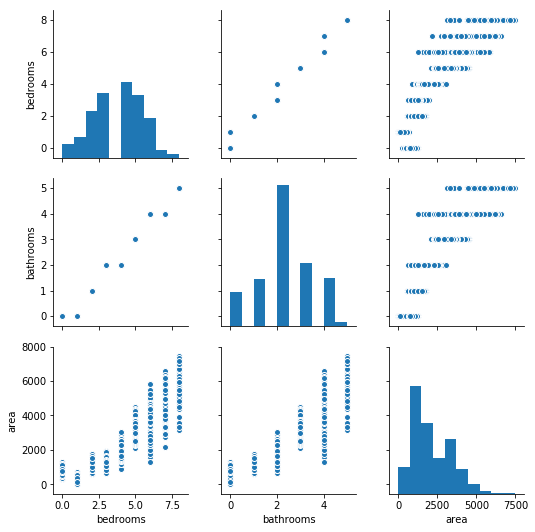

In [24]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']])

`2.`  首先，你可以在每个预测变量和价格之间拟合线性模型，并在多重线性回归模型中使用所有变量和价格。每个模型都显示出一种正相关——也就是说，当浴室、卧室或面积增加时，我们预测，房屋价格会上涨。

使用房屋 **price** 、**bedrooms** 、 **bathrooms** 与 **area** 拟合一个线性模型。使用摘要回答下面的第二个测试题目。 **不要忘了添加一个截距。 **

In [57]:
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bathrooms', 'area']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:15:58   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

虽然我们希望面积、卧室和卫生间与反应变量存在相同的关系，即随着它们增加反应变量也应该增加，但卧室与反应变量存在负系数，那么虽然价格和卧室与其他变量存在正相关，但是在多重线性回归模型中两者呈现负相关对这一系数的解释与我们直觉上认为的是相反的，在双变量例子中实际上为真，这是模型中多重共线性的一个潜在副作用，即这与你认为是正确的系数恰好相反，另一个常见的方式是认为我们的预测值之间具有相关性，除了我们看到的散点图，还有方差膨胀因子简写为VIF

`3.` 计算模型中每个变量的 VIF。在下面的测试3中给出关于你的 VIF 结果的见解。 [这里](https://etav.github.io/python/vif_factor_python.html) 有一篇有用的文章，想要了解的话，可以点击进行阅读。

In [58]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms',
                 df,
                 return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif["features"] = X.columns
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


我们可以看到每个变量的方差膨胀因子，都可以从我创建的方差膨胀因子数据帧中获取，我们想要删除两个变量中的至少一个，因为两者方差膨胀因子都大于10




`4.` 从上面的模型中移除 bathrooms。 重新设置多重线性回归模型并重新计算 VIF。 在下面的最后一个测试题目中给出关于你对该结果的看法。

In [ ]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'area']])
results = lm.fit()
results.summary()

In [59]:
y1, X1 = dmatrices('price ~ area + bedrooms', df, return_type='dataframe')
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [
    variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])
]
vif1["features"] = X1.columns
vif1

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.7gh4txyi16y.png)

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.w0ahy0des6.png)

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.sa5esq71xr.png)

**我们希望x变量与响应相关，但不要彼此相关。** 当我们的x变量彼此相关时，这被称为**多重共线性**。多重共线性有两个潜在的负面影响。正如您在上一个示例中看到的那样，

1. 当存在多重共线性时，x变量和响应之间的预期关系可能不成立。也就是说，您可能期望解释变量与响应之间存在正相关关系（基于双变量关系），但在多元线性回归的情况下，它会将关系视为负数。

   

2. 我们的假设检验结果可能不可靠。事实证明，具有相关的解释变量意味着我们的系数估计值不太稳定。也就是说，与回归系数相关的标准偏差（通常称为标准误差）非常大。因此，特定变量可能对预测响应很有用，但由于它与其他x变量的关系，您将不再看到此关联。

**我们还研究了识别多重共线性的两种不同方法**：

1. 我们可以看看每个解释变量与每个其他解释变量的相关性（用图或相关系数）。

   

2. 我们可以查看每个变量的VIF，这个计算将在下一个视频中更详细地显示。

当VIF大于10时，这表明多重共线性肯定是模型中的一个问题。一些专家甚至认为大于5的VIF可能会有问题。在大多数情况下，不仅一个VIF很高，而且很多VIF都很高，因为它们是相关变量如何相互作用的度量。

在多元线性回归模型中使用相关解释变量的最常用方法是简单地删除与其他变量最相关的变量之一。选择一个您不感兴趣或对您不重要的解释变量是一种常见的选择。

# 高阶项 
## 要怎么确定高阶项？
当将两个或更多个x变量彼此相乘时，创建线性模型中的更高阶项。常见的高阶术语包括平方（$X_1^2$）和立方体（$X_1 ^ 3$ ），其中x变量乘以其自身，以及相互作用（$x_1x_2$），其中两个或多个x变量相互相乘。

在没有更高阶阶的模型中，您可能会有一个等式：

$\hat {y} = b_0 + b_1x_1 + b_2x_2$

然后我们可以决定用更高阶项来改进线性模型。等式可能会变为：

$\hat {y} = b_0 + b_1x_1 + b_2x_1 ^ 2 + b_3x_2 + b_4x_1x_2$

在这里，我们介绍了二次方（$b_2x_1 ^ 2$）和相互作用（$b_4x_1x_2$）术语进入模型。

通常，这些术语可以帮助您在数据中使用更复杂的关系。然而，正如我们迄今所看到的那样，它们也很容易解释系数的解释。您可能想知道：“如果我需要其中一个更高阶项，我该如何识别？”

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.97ftjehz2ie.png)

在创建具备 二阶、三阶 甚至更高阶变量的模型时，基本上我们要看的是解释变量和反应变量的关系里有多少条曲线。 

如果像下图一样，图中曲线折了一个弯，那你会想添加一个二阶项到模型里，因为我们可以明显地发现，只用一条线来拟合这个关系并不能得到最佳效果。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.i5nf3n6pr7i.png)

当解释变量和反应变量的关系折了两个弯，我们就会想添加一个三阶的关系，如下图所示。 

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.4kucuxz35il.png)

https://tamino.wordpress.com/2011/03/31/so-what/

# 解释交互项

在之前的视频中，您了解了如何解释交互（或者能够识别交互）。

从数学上来说，通过将两个变量相乘，并将这个项添加到我们的线性回归模型中，可以创建一个交互。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.frqqf88d0w6.png)

上一个视频使用 **面积 area** 的示例（$X_1$）和 **街区 neighborhood**（$X_2$）房屋（**A or B**）预测**房价 price**（$y$）。在视频屏幕的顶部，您可能已经注意到使用这些变量的线性模型的等式：

$\hat {y} = b_0 + b_1x_1 + b_2x_2$

此示例不涉及交互项，如果变量的关系类似于下图中的关系，则此模型是合适的。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.t2x3rw2a91.png)

其中 $b_1$是我们估计**面积**和**价格**之间关系的方式，在这个模型中我们认为无论街区如何，面积和价格都是相同的。

然后 $b_2$是价格的差异取决于你所在的街区，也就是这里两条线之间的**垂直**距离：

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.9scf9foa4j.png)

请注意，这里**面积**与**价格**的关系是不变的，与**街区**无关。

和

不同**街区**的**价格**差异是一样的，无论**面积**大小。

当这些陈述成立时，我们的模型中不需要交互术项。但是，当**面积与价格相关的方式因街区而异**时，我们需要进行交互。

在数学上，当面积与价格相关的方式取决于街区时，这表明我们应该添加交互。通过添加交互，我们允许每个街区的直线的斜率不同，如下图所示。在这里，我们添加了交互，你可以看到这两个斜率有所不同。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.c2j3cnxre2b.png)

这些线甚至可能快速交叉或分开。这两者中的任何一个都表明，**面积**和**街区**之间存在与**价格**相关的交互。

讲师授课视频内容

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('datasets/house_prices.csv')
df.head()

In [60]:
df['bedrooms_squared'] = df['bedrooms'] * df['bedrooms']

In [61]:
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bedrooms_squared']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4199.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:23:53   Log-Likelihood:                -85302.
No. Observations:                6028   AIC:                         1.706e+05
Df Residuals:                    6025   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         1.509e+05   1.58e+04      9.524      0.000     1.2e+05    1.82e+05
bedrooms          5.223e+04   8906.834      5.865      0.000    3.48e+04    6.97e+04
bedrooms_squared  2.446e+04   1184.538     20.647      0.000    2.21e+04    2.68e+04
==============================================================================
Omnibus:                      626.860   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.588
Skew:                           0.793   Prob(JB):                    9.23e-200
Kurtosis:                       4.064   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
df['bedrooms_cubed'] = df['bedrooms_squared'] * df['bedrooms']

In [63]:
lm = sm.OLS(
    df['price'],
    df[['intercept', 'bedrooms', 'bedrooms_squared', 'bedrooms_cubed']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     2867.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:26:00   Log-Likelihood:                -85260.
No. Observations:                6028   AIC:                         1.705e+05
Df Residuals:                    6024   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         2.492e+05    1.9e+04     13.134      0.000    2.12e+05    2.86e+05
bedrooms         -1.015e+05   1.88e+04     -5.400      0.000   -1.38e+05   -6.46e+04
bedrooms_squared  7.597e+04   5680.821     13.374      0.000    6.48e+04    8.71e+04
bedrooms_cubed   -4674.8551    504.331     -9.269      0.000   -5663.525   -3686.186
==============================================================================
Omnibus:                      670.934   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.039
Skew:                           0.831   Prob(JB):                    5.16e-217
Kurtosis:                       4.097   Cond. No.                         746.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 系数解释

Interpreting Model Coefficients.ipynb

你不仅要能够拟合复杂的线性模型，还可以知道哪些变量是可以解释的，这一点很重要。

在该 notebook 中，你将拟合几种不同的模型，并在可能的情况下使用下面的测试题将适当的解释与你的系数相匹配。

在某些情况下，你的线性回归模型的系数将不会被保留，因为缺乏重要性，这不是该 notebook 的目的 。**这一点需要严格执行，从而确保你很好地理解解释系数（当它们是可以解释的时候）的方法。**

In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('datasets/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


我们将在整个 notebook 上为这个数据集拟合许多不同的模型。 每个模型都有一个测试题目，这些题目可以让你将模型系数的解释与相应的值相匹配。 当然，如果没有’好’的解释的话，这也是选择之一！

## 模型 1

`1.` 对于第一个模型，通过使用一个房屋的 `neighborhood`、 `style` 与 `area` 拟合一个模型来预测 `price`  。使用输出，将正确的值与下面测试1中的相应解释相匹配。不要忘记添加一个截距！ 你还需要构建虚拟变量，并且在拟合线性模型时不要忘记删除其中一列。在第一个测试题目中，通过将基线创建 邻域 **C** 与房屋 style **lodge**，将系数解释与第一个测验中的值联系起来可能是最容易的。 


In [76]:
# Adding the intercept, and creating our dummy variables
df['intercept'] = 1
df[['A', 'B', 'C']] = pd.get_dummies(df['neighborhood'])
df[['lodge', 'ranch', 'victorian']] = pd.get_dummies(df['style'])

df.head(6)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1
5,7507,C,1785,4,2,lodge,455235,1,0,0,1,1,0,0


In [77]:
lm = sm.OLS(df['price'],
            df[['intercept', 'A', 'B', 'ranch', 'victorian', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:22:44   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.983e+05   5540.744    -35.791      0.000   -2.09e+05   -1.87e+05
A           -194.2464   4965.459     -0.039      0.969   -9928.324    9539.832
B           5.243e+05   4687.484    111.844      0.000    5.15e+05    5.33e+05
ranch      -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
victorian  -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
area         348.7375      2.205    158.177      0.000     344.415     353.060
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
df.groupby('style').mean()[['price', 'area']]

,price,area
style,,
lodge,3.050176e+05,848.978031
ranch,5.751318e+05,1611.317980
victorian,1.046083e+06,2980.959960


## 模型 2

`2.` 现在我们来试一下预测价格的第二个模型。这一次，我们使用 `area` 与 `area squared` 来预测价格，同时也要用到房屋的 `style` 。你需要再次需要使用虚拟变量，并在模型中添加一个截距。使用模型的结果来回答第二个与第三个测试题目。

In [79]:
# Adding the intercept, and creating our dummy variables
df['area_squared'] = df['area'] * df['area']
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian,area_squared
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0,1411344
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1,12334144
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0,1285956
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0,3763600
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1,4875264


In [80]:
lm2 = sm.OLS(df['price'],
             df[['intercept', 'area', 'area_squared', 'ranch', 'victorian']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:23:29   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
victorian     2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.eat07h7yvuh.png)

#  特征工程与特征选择 Feature Engineering and Feature Selection

构建任何一种模型，无论是回归模型，还是更高级的机器学习模型，由于特征工程和特征选择，可以不断实现构建模型最大的优势，那这是什么意思呢？

**特征选择**是指**选择应该在模型中使用的解释变量**，我们已经了解了为什么会保留或删除某些变量的原因，如与系数的显著水平，或者是可以观察方差膨胀因子VIFs，另一种考虑保留特征的方法是**交叉验证或正则化**，我们会在这节课快速讨论交叉验证，不过下面讲师注释提供的链接中也有另外免费的优达学城课程

特征工程包括
- 使用缺失值增加或删除行，
- 或者利用初始特征的不同比例创建新的一列，
- 以及将文本和图片转化为数字等，
- 或者创建虚拟变量，你已经在之前的课程中掌握了这一内容
 
 ![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.uuc4rrwefs.png)

完成特定类型的特征工程时，如标准化或使用对数和指值，或你将在接下来概念中见到的其他转换，这些都会导致回归系数无法解释，我并不热衷于回归模型，但是特征工程的其他类型 如创建虚拟变量，或利用缺失值，对于成功得到模拟结果并进行解释非常重要

## 特征工程
Feature Engineering.ipynb

为了更好地理解常见的特征工程技术以及如何在 python 中实现它们，我们将使用一个小数据集。 首先，我们创建衣柜数据集，并导入必要的库。

In [91]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.preprocessing as p

df = pd.DataFrame({
    'response': [2.4, 3.3, -4.2, 5.6, 1.5, 8.7],
    'x1': ['yes', 'no', 'yes', 'maybe', 'no', 'yes'],
    'x2': [-1, -3, np.nan, 0, np.nan, 1],
    'x3': [2.4, 15, 3.3, 2.4, 1.8, 0.4],
    'x4': [np.nan, np.nan, 1, 1, 1, 1],
    'x5': ['A', 'B', np.nan, 'A', 'A', 'A']
})
df

,response,x1,x2,x3,x4,x5
0,2.4,yes,-1.0,2.4,NaN,A
1,3.3,no,-3.0,15.0,NaN,B
2,-4.2,yes,NaN,3.3,1.0,NaN
3,5.6,maybe,0.0,2.4,1.0,A
4,1.5,no,NaN,1.8,1.0,A
5,8.7,yes,1.0,0.4,1.0,A


`1.` 在响应与数据集中的三个 x 变量之间拟合一个线性模型。另外，添加一个截距。使用你的结果回答下面的第一个测试题目。

In [92]:
df['intercept'] = 1
lm = sm.OLS(df['response'], df[['intercept', 'x2', 'x3', 'x4']])
results = lm.fit()
results.summary()

MissingDataError: exog contains inf or nans

出错了，因为数据缺失，算法不能收敛

`2.` 使用 [这里](http://scikit-learn.org/stable/modules/preprocessing.html) 的 sklearn 文件和之前的视频来帮助填写列均值的每个定量列的缺失值。现在，使用新列重新拟合问题 `1.`中的线性模型，并使用结果来回答下面的第二个测试题目。

In [93]:
imp = p.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df[['x2', 'x3', 'x4']])
df[['x2', 'x3', 'x4']] = imp.transform(df[['x2', 'x3', 'x4']])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
df.head()

In [94]:
lm = sm.OLS(df['response'], df[['intercept', 'x2', 'x3', 'x4']])
results = lm.fit()
results.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1.438
Date:                Sun, 14 Jul 2019   Prob (F-statistic):              0.365
Time:                        15:34:12   Log-Likelihood:                -14.742
No. Observations:                   6   AIC:                             35.48
Df Residuals:                       3   BIC:                             34.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1507      1.111      1.036      0.376      -2.384       4.685
x2             5.1202      3.053      1.677      0.192      -4.594      14.835
x3             1.0487      0.752      1.394      0.258      -1.345       3.442
x4             1.1507      1.111      1.036      0.376      -2.384       4.685
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.043
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.515
Skew:                          -1.531   Prob(JB):                        0.284
Kurtosis:                       3.828   Cond. No.                     4.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`3.` 另一种常用的缩放特征的方法是减去均值并除以标准偏差。有特定的一些机器学习算法，在这些算法中，你应该经常考虑这种类型的缩放（或其他规范化的方法），就像在 [这里](https://stats.stackexchange.com/questions/189652/is-it-a-good-practice-to-always-scale-normalize-data-for-machine-learning) 讨论的那样。使用 [sklearn 文件 ](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) 和之前的视频来帮助你对数据集中的三个新的定量列进行缩放。

为了确保你正确地执行了这些算法转换，请回答下面的第三个测试题目。

In [87]:
norm = p.StandardScaler()
norm.fit(df[['x2', 'x3', 'x4']])
norm.transform(df[['x2', 'x3', 'x4']])

array([[-0.20701967, -0.3706604 ,  0.        ],
       [-1.86317701,  2.20015852,  0.        ],
       [ 0.        , -0.18703048,  0.        ],
       [ 0.621059  , -0.3706604 ,  0.        ],
       [ 0.        , -0.49308035,  0.        ],
       [ 1.44913767, -0.7787269 ,  0.        ]])

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.k7xrnv19w5d.png)

## K-fold cross validation  K折交叉验证

对收集的数据创建模型 可以有许多方式，无论是上节课中创建虚拟变量，或高阶项，还是填充缺失值的其他技巧之一

要测量数据，**Scikit-learn** 和 **Pandas** 是两个著名的特征工程库，在 scikit-learn 预处理中， 有很多方法，例如：
- StandardScaler
- MinMax scaler MaxAbs Scaler 最小最大缩放器
- QuantileTransformer 量化转换器
- 归一化
- 二进制化 
- 编码类属特征
- 输入缺失值
- 自定义转换

对于模型评估的测量标准，不同方法存在巨大争议，常见测量标准包括 **R 平方和均方差**，其他测量方法包括赤池信息准则 (AIC)，贝叶斯信息准则 (BIC) 和马洛斯的 CP 值，还有许多其他我没有提过的测量标准，可以评价你的回归模型，或其他模型是否较好地拟合数据，这些测量标准的值取决于数据的缩放比例，和预测反应变量的变量，根据我的经验 人们在实际中倾向于使用 R 平方和均方差，但是实际上这些方法在模型拟合中存在误导性，如果我们只验证对同一个数据集的做法，事实证明 无论我们向模型中添加什么变量，都会提升预测，这就是 R 平方值增加和均方差下降的原因

那么我们怎样知道增加变量，是否真的改善了模型与数据的拟合度呢？这里有个非常有效的技巧 **称为交叉验证**，能够恰好预测这个想法，即增加越多变量 可以认为模型总体得到改善

在接下来的概念中，你将学习交叉验证的原理，以及如何使用 Scikit-Learn 构建应用到实践

## 交叉验证的原理
在上一个视频中，我讨论了模型中简单地添加越来越多的变量，可以产生均方差值中更优的 R 平方，已经介绍过交叉验证这种观点

在交叉验证中我们，对数据子集训练回归模型 **称为训练数据**，我们测试模型如何较好地运行 **称为测试集**，在交叉验证中我们通过多次完成这些部分，确保模型也可以通用化，Sebastian 将会向你一步步展示如何做到，然后我们在 Python 中进行练习

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.h5n7b3lwln.png)


在进入交叉验证之前 我们先来讨论一下，将数据集分拆为训练和测试数据的问题，假设这就是你的数据，现在你要说出哪个部分的数据是测试 哪个是训练，你进入的困境是希望将两个集合都做到最大化

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.iizhe639d0h.png)
你希望在训练集中有尽可能多的数据点，以获得最佳学习结果 同时也希望测试集中有最大数量的数据项，来获得最佳验证，但显然这里需要进行折衷 每当你从训练集中取出一个数据点拿去测试，训练集中就会少一个数据点，所以 我们要重新设定这个折衷，这就是涉及到交叉验证的地方，基本要点是将训练数据平分到相同大小的 k 个容器内

例如有 200 个训练数据点，有十个容器，很快便可得出，每个容器内有多少个数据点呢？很明显 是 20，所以 10 个容器内分别有 20 个数据点，然而在 Katie 讲述的操作中 你只是挑选其中一个容器，作为验证容器 另一个作为训练容器，在 k 折交叉验证中 你将运行 k 次单独的学习试验，在每次试验中 **你将从这 k 个子集中挑选一个作为验证集，剩下 k-1 个容器放在一起作为训练集**，然后训练你的机器学习算法，与以前一样 将在验证集上验证性能，交叉验证中的要点是这个操作会运行多次，在此例中为十次 然后将十个不同的测试集，对于十个不同的保留集的表现进行平均，就是将这 k 次试验的测试结果取平均值，显然 这会花更多的计算时间 因为你要运行，k 次单独的学习试验，但学习算法的评估将更加准确，从某种程度上讲 你差不多使用了全部训练数据进行训练，以及全部训练数据进行验证

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.gd90diqesnb.png)

比如我们提一个问题，假设你可以选择按照 Katie 讲述的静态训练测试方法来操作，也可以按照 10 折交叉验证来操作，你实际关心的是将训练时间降至最低，使用机器学习算法进行训练后将运行时间降至最低，忽略训练时间 将查准率提至最高，在这三种情形下 你可以挑选训练/测试或者，10 折交叉验证，告诉我你的最佳猜测，你会选择哪一种？对于每个最短的训练时间，请在右边选择两者之一

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.l5bkouuet9.png)

1. 一次训练会快于10次训练，那么很显然训练集/测试集拆分很可能是更好的选择，
2. 如果你想最小化运行时间，在每一个情形下你最终都得选用一个机器运行算法，那么我可以说如果你想最小化运行时间，你同样可以得到十折交叉验证的好处，从而可更好评估事态，但是，它不是很清晰 或者不是很正确，
3. 但是如果你想最大化你所评估的精确性，你的算法好到什么程度，你肯定要选择十折交叉验证，花更多点时间 你就会得到更好的结果

Udacity 机器学习入门免费课程https://classroom.udacity.com/courses/ud120

# 案例研究

Case Study.ipynb

在这个案例研究中，你将继续使用在波士顿房屋数据。但是，你现在可以更好地处理此数据集中实际存在的复杂性。

首先，让我们设定库和数据。

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from patsy import dmatrices
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df2.columns = boston_data.feature_names
df = df.join(df2)
df.head()

,MedianHomePrice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


你将要用到 notebook 的 **df** 数据帧。你可以在 [这里](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) 找到数据集中关于特征的描述。具体而言，你将尝试使用数据集中的其他变量来构建最佳模型以预测平均房价。 

`1.` 使用 [train test_split](http://scikit-learn.org/stable/modules/cross_validation.html) 创建一个 training 数据集与一个 test 数据集，其中20％的数据在 test 数据集中。无序状态设为0。将结果存储在 `X_train, X_test, y_train, y_test` 中。

In [96]:
X_data = df.drop('MedianHomePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    df['MedianHomePrice'],
                                                    test_size=0.2,
                                                    random_state=0)


除非指定，否则只能使用 `X_train` 与 `y_train` 变量来回答以下问题。

`2.` 首先，获取数据集中每个特征的汇总。使用汇总的结果回答下面的第一个与第二个测试题目。同样，使用 [corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) 方法对每个变量进行相互比较。

In [97]:
df2 = pd.DataFrame()
df2['MedianHomePrice'] = y_train
df2[list(df.columns)[1:]] = X_train

In [98]:
df2.describe()

,MedianHomePrice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,22.611881,3.386324,11.794554,11.123441,0.069307,0.555886,6.301797,69.027228,3.770242,9.403465,402.844059,18.462376,358.785446,12.706188
std,9.238777,8.137943,23.636906,6.993011,0.254290,0.115201,0.694692,28.106955,2.080583,8.661147,170.857022,2.194821,88.663438,7.299031
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,16.775000,0.078935,0.000000,5.130000,0.000000,0.449000,5.887750,45.675000,2.087875,4.000000,276.000000,17.400000,376.132500,6.727500
50%,21.400000,0.256510,0.000000,9.125000,0.000000,0.538000,6.211000,77.950000,3.190950,5.000000,322.000000,19.100000,391.600000,11.300000
75%,25.525000,3.359358,20.000000,18.100000,0.000000,0.631000,6.675000,93.900000,5.141475,24.000000,666.000000,20.200000,396.060000,17.112500
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [99]:
df2.corr()

,MedianHomePrice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MedianHomePrice,1.000000,-0.411133,0.409824,-0.525054,0.177620,-0.459566,0.705039,-0.413340,0.281013,-0.425133,-0.511025,-0.563566,0.354226,-0.755666
CRIM,-0.411133,1.000000,-0.203052,0.394004,-0.059438,0.437684,-0.196545,0.340676,-0.372582,0.625828,0.578899,0.280752,-0.331379,0.464403
ZN,0.409824,-0.203052,1.000000,-0.534523,-0.024872,-0.527536,0.348199,-0.585812,0.656658,-0.313497,-0.329665,-0.396806,0.171123,-0.428584
INDUS,-0.525054,0.394004,-0.534523,1.000000,0.019945,0.757107,-0.405883,0.635978,-0.699502,0.573361,0.720073,0.390679,-0.342290,0.606026
CHAS,0.177620,-0.059438,-0.024872,0.019945,1.000000,0.032281,0.107340,0.048548,-0.071933,-0.010475,-0.048810,-0.107799,0.079502,-0.061047
NOX,-0.459566,0.437684,-0.527536,0.757107,0.032281,1.000000,-0.304220,0.743162,-0.774841,0.635081,0.693064,0.199779,-0.384622,0.596475
RM,0.705039,-0.196545,0.348199,-0.405883,0.107340,-0.304220,1.000000,-0.261999,0.204028,-0.197837,-0.290858,-0.379197,0.140592,-0.620118
AGE,-0.413340,0.340676,-0.585812,0.635978,0.048548,0.743162,-0.261999,1.000000,-0.754547,0.444137,0.504211,0.244094,-0.253652,0.612759
DIS,0.281013,-0.372582,0.656658,-0.699502,-0.071933,-0.774841,0.204028,-0.754547,1.000000,-0.479621,-0.536082,-0.203303,0.268693,-0.503193
RAD,-0.425133,0.625828,-0.313497,0.573361,-0.010475,0.635081,-0.197837,0.444137,-0.479621,1.000000,0.904438,0.447445,-0.446020,0.480207


`2.` 接下来，使用 [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) 来缩放数据集中的所有 x 变量。将结果存储在 `X_scaled_train` 中。 创建一个 pandas 数据帧并存储缩放的 x 变量以及 training 响应。把该数据帧命名为 `training_data` 。

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_train = pd.DataFrame(X_scaled_train)
X_scaled_train.columns = list(df.columns)[1:]
df3 = X_scaled_train.join(y_train.reset_index())

`3.` 接下来，记得用 **所有的** 缩放特征来拟合线性模型，以预测此响应（平均房价）。不要忘记添加一个截距。使用你的线性模型的结果来回答下面的第三个测试题目。

In [101]:
df3['intercept'] = 1
X_vars_full = df3.drop(['MedianHomePrice', 'index'], axis=1, inplace=False)
lm = sm.OLS(df3['MedianHomePrice'], X_vars_full)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sun, 14 Jul 2019   Prob (F-statistic):          9.64e-117
Time:                        15:44:26   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.9708      0.298     -3.257      0.001      -1.557      -0.385
ZN             1.0571      0.341      3.102      0.002       0.387       1.727
INDUS          0.0383      0.443      0.087      0.931      -0.832       0.909
CHAS           0.5945      0.229      2.595      0.010       0.144       1.045
NOX           -1.8551      0.485     -3.828      0.000      -2.808      -0.902
RM             2.5732      0.317      8.106      0.000       1.949       3.197
AGE           -0.0876      0.402     -0.218      0.828      -0.878       0.703
DIS           -2.8809      0.445     -6.480      0.000      -3.755      -2.007
RAD            2.1122      0.607      3.481      0.001       0.919       3.305
TAX           -1.8753      0.665     -2.819      0.005      -3.183      -0.567
PTRATIO       -2.2928      0.300     -7.636      0.000      -2.883      -1.702
B              0.7182      0.261      2.749      0.006       0.204       1.232
LSTAT         -3.5925      0.395     -9.086      0.000      -4.370      -2.815
intercept     22.6119      0.223    101.576      0.000      22.174      23.050
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`4.` 现在，使用下面的函数来计算数据集中每个 x_variable 的 vif，并使用该函数的结果来回答下面的第四个测试题目。

In [103]:
def vif_calculator(df, response):
    '''
    INPUT:
    df - a dataframe holding the x and y-variables
    response - the column name of the response as a string
    OUTPUT:
    vif - a dataframe of the vifs
    '''
    df2 = df.drop(response, axis=1, inplace=False)
    features = "+".join(df2.columns)
    y, X = dmatrices(response + ' ~' + features, df, return_type='dataframe')
    vif = pd.DataFrame()
    vif["VIF Factor"] = [
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    vif["features"] = X.columns
    vif = vif.round(1)
    return vif

In [104]:
vifs = vif_calculator(df3, 'MedianHomePrice')

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [105]:
vifs

,VIF Factor,features
0,0.0,Intercept
1,1.8,CRIM
2,2.4,ZN
3,4.0,INDUS
4,1.1,CHAS
5,4.7,NOX
6,2.0,RM
7,3.3,AGE
8,4.0,DIS
9,7.8,RAD


`5.` 根据查看 p 值和 VIF 的结果，确定删除 `AGE`、 `NOX` 与 `TAX` ，之后重新开始。用这些已删除的特征（但仍然带有截距）来拟合一个新的线性模型。使用这个线性模型和先期模型的结果来回答下面的第五个测试题目。

In [106]:
X_vars_red = df3.drop(['MedianHomePrice', 'index', 'AGE', 'NOX', 'TAX'],
                      axis=1,
                      inplace=False)
lm = sm.OLS(df3['MedianHomePrice'], X_vars_red)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sun, 14 Jul 2019   Prob (F-statistic):          2.55e-114
Time:                        15:47:13   Log-Likelihood:                -1184.8
No. Observations:                 404   AIC:                             2392.
Df Residuals:                     393   BIC:                             2436.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.8864      0.306     -2.896      0.004      -1.488      -0.285
ZN             0.9672      0.338      2.863      0.004       0.303       1.631
INDUS         -1.1053      0.381     -2.900      0.004      -1.855      -0.356
CHAS           0.6846      0.234      2.924      0.004       0.224       1.145
RM             2.6910      0.319      8.425      0.000       2.063       3.319
DIS           -2.1130      0.403     -5.249      0.000      -2.905      -1.322
RAD            0.1727      0.362      0.477      0.633      -0.539       0.884
PTRATIO       -1.9578      0.292     -6.701      0.000      -2.532      -1.383
B              0.7783      0.267      2.913      0.004       0.253       1.304
LSTAT         -3.8621      0.376    -10.278      0.000      -4.601      -3.123
intercept     22.6119      0.229     98.665      0.000      22.161      23.062
==============================================================================
Omnibus:                      141.354   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              641.018
Skew:                           1.461   Prob(JB):                    6.38e-140
Kurtosis:                       8.436   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`6.` 给出之前的线性回归模型的结果，从模型中删除 `RAD` 变量。然后仔细检查所有的 VIF 是否小于4。所有的变量现在应该显示与响应的具有的线性关系，并且与先前模型相比，Rsquared 值没有发生变化。

In [107]:
X_vars_red2 = df3.drop(
    ['MedianHomePrice', 'index', 'AGE', 'NOX', 'TAX', 'RAD'],
    axis=1,
    inplace=False)
lm = sm.OLS(df3['MedianHomePrice'], X_vars_red2)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sun, 14 Jul 2019   Prob (F-statistic):          2.38e-115
Time:                        15:47:29   Log-Likelihood:                -1184.9
No. Observations:                 404   AIC:                             2390.
Df Residuals:                     394   BIC:                             2430.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.8214      0.274     -2.999      0.003      -1.360      -0.283
ZN             0.9824      0.336      2.924      0.004       0.322       1.643
INDUS         -1.0633      0.370     -2.870      0.004      -1.792      -0.335
CHAS           0.6902      0.234      2.954      0.003       0.231       1.150
RM             2.7099      0.317      8.559      0.000       2.087       3.332
DIS           -2.1356      0.399     -5.347      0.000      -2.921      -1.350
PTRATIO       -1.9132      0.277     -6.919      0.000      -2.457      -1.370
B              0.7470      0.259      2.887      0.004       0.238       1.256
LSTAT         -3.8569      0.375    -10.278      0.000      -4.595      -3.119
intercept     22.6119      0.229     98.762      0.000      22.162      23.062
==============================================================================
Omnibus:                      144.295   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.390
Skew:                           1.487   Prob(JB):                    4.40e-146
Kurtosis:                       8.561   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
df4 = df3.drop(['index', 'AGE', 'NOX', 'TAX', 'RAD'], axis=1, inplace=False)
vifs = vif_calculator(df4, 'MedianHomePrice')
vifs

,VIF Factor,features
0,0.0,Intercept
1,1.4,CRIM
2,2.2,ZN
3,2.6,INDUS
4,1.0,CHAS
5,1.9,RM
6,3.0,DIS
7,1.5,PTRATIO
8,1.3,B
9,2.7,LSTAT


`6.` 因为使用线性模型通过 statsmodels 扩展到 test 数据有点乏味，所以我们将使用 [sklearn 这样去做 ](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)。 以下是将完整模型拟合到我们的数据的一个例子。

正如你可以在文档中看到的那样，你需要注意一点，该数据默认使用 sklearn 的线性模型进行缩放。  

我在模型下面的单元格中创建了剩余的 X 矩阵。使用这些来修改并查看哪个模型在 test 集上的效果最好。使用你的结果回答下面的最后一个测试题目。

In [109]:
X_data = df.drop('MedianHomePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    df['MedianHomePrice'],
                                                    test_size=0.2,
                                                    random_state=0)

lm_full = LinearRegression()
lm_full.fit(X_train, y_train)
lm_full.score(X_test, y_test)

0.589222384918251

In [110]:
X_train_red = X_train.drop(['AGE', 'NOX', 'TAX'], axis=1, inplace=False)
X_test_red = X_test.drop(['AGE', 'NOX', 'TAX'], axis=1, inplace=False)

X_train_red2 = X_train.drop(['AGE', 'NOX', 'TAX', 'RAD'],
                            axis=1,
                            inplace=False)
X_test_red2 = X_test.drop(['AGE', 'NOX', 'TAX', 'RAD'], axis=1, inplace=False)

In [111]:
lm_red = LinearRegression()
lm_red.fit(X_train_red, y_train)
print(lm_red.score(X_test_red, y_test))

lm_red2 = LinearRegression()
lm_red2.fit(X_train_red2, y_train)
print(lm_red2.score(X_test_red2, y_test))

0.5486961797351759
0.5451467133386514


![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.ugzw8liaffs.png)

# 复习 

本课程讲解了 **大量** 知识。 

1. 你学习了如何在 python 里创建多元线性回归模型，创建方法其实与上节课创建简单线性回归模型十分类似。 
2. 你学习了如何编码虚拟数据并解释相应的系数。 
3. 你学习了高阶项，也知道了高阶项会怎么影响系数解释。 
4. 你知道了多元线性回归模型需要交互项意味着什么，也学习了如何确定其它高阶项。但这里需要重申一次，涉及到交互项和高阶项，直接解释系数的重要性就居于其次了，你的模型将更侧重于预测效果，所以其解释效果有所降低。 
5. 你学习了模型假设，我们还进一步探讨了多重共线性。你学习了方差膨胀因子，也知道了多重共线性会如何影响模型系数和标准误差。 
6. 你学习了模型选择和特征工程技巧。 
7. 你学习了交叉验证，知道要如何把测试集拆分成训练-测试集，从而判断模型最好要保留哪些解释变量。 

本课讲解的许多知识都是机器学习的核心技巧，但我们只是接触到冰山一角而已，优达学城有一整个课程专门讲授机器学习，在该课程中，你可以更深入地学习本课涉及的诸多知识点。  